##### 
- Name: Devika Jonjale 
- Assignment: Accredian 
- Role: Data Science Content Specialist Intern

--------------------------------

# <center> Business Context: </center>

- This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

- Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model. model.

-----------------------------------------

# <center> Data Dictionary: </center>

- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
- amount - amount of the transaction in local currency.
- nameOrig - customer who started the transaction
- oldbalanceOrg - initial balance before the transaction
- newbalanceOrig - new balance after the transaction
- nameDest - customer who is the recipient of the transaction
- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction. single transaction.

-----------------------------

# <center> Expectations: </center>Tto execute the process for proactive detection of fraud while answeringthe  following 
questio:s.
1. Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if? they work

---------------------------

### IMPORTING NECESSARY LIBRARIES:

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import itertools
from collections import Counter

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### READING THE DATASET:

In [ ]:
df=pd.read_csv('Fraud.csv')
df.head(6)

### DATA PREPROCESSING:

In [ ]:
df.sample(6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


----------------------

## 1.1 DATA CLEANING: Missing Values:

In [8]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='cividis')

,dtypes,missing#,missing%,uniques,count,min,max,mean
step,int64,0,0.000000,743,6362620,1.000000,743.000000,243.397246
type,object,0,0.000000,5,6362620,nan,nan,nan
amount,float64,0,0.000000,5316900,6362620,0.000000,92445516.640000,179861.903549
nameOrig,object,0,0.000000,6353307,6362620,nan,nan,nan
oldbalanceOrg,float64,0,0.000000,1845844,6362620,0.000000,59585040.370000,833883.104074
newbalanceOrig,float64,0,0.000000,2682586,6362620,0.000000,49585040.370000,855113.668579
nameDest,object,0,0.000000,2722362,6362620,nan,nan,nan
oldbalanceDest,float64,0,0.000000,3614697,6362620,0.000000,356015889.350000,1100701.666520
newbalanceDest,float64,0,0.000000,3555499,6362620,0.000000,356179278.920000,1224996.398202
isFraud,int64,0,0.000000,2,6362620,0.000000,1.000000,0.001291


In [9]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

([<matplotlib.patches.Wedge at 0x11a1043fe80>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87'),
  Text(0.599995066874818, -0.002433048680711153, '0.13')])

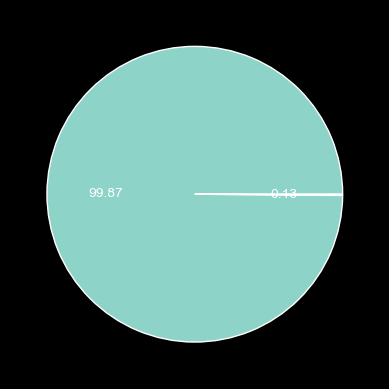

In [17]:
plt.pie(df['isFraud'].value_counts(), autopct='%.2f')

In [20]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<Axes: >

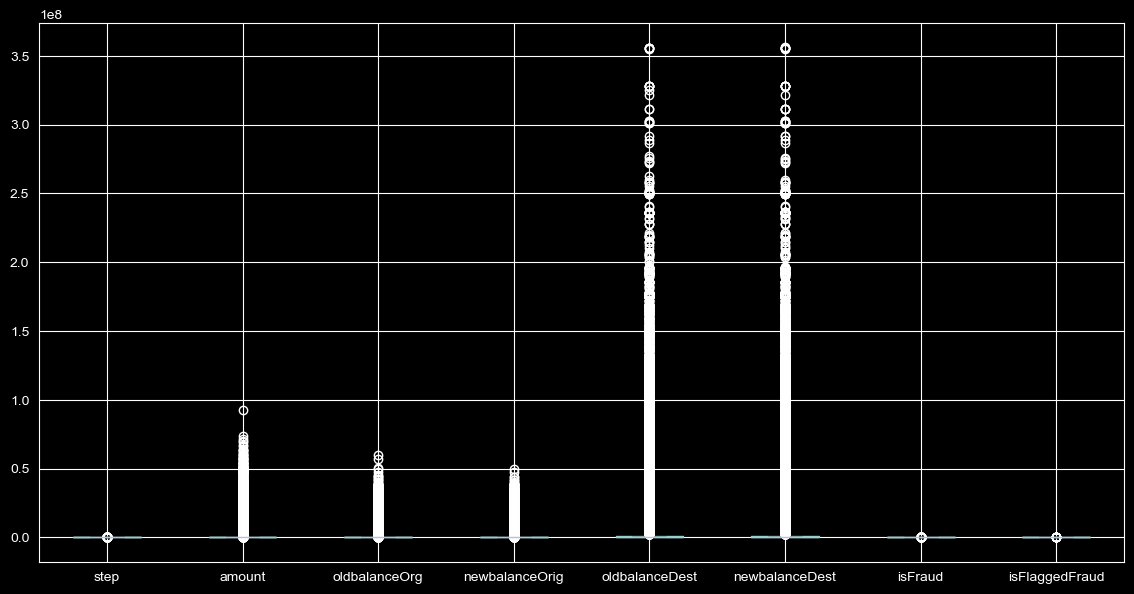

In [21]:
df.boxplot(figsize=(14,7))

## 1.2 Outliers Detection:

In [23]:
# Selecting only the numeric columns
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculating quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: oldbalanceOrg, Percentage of outliers: 17.49%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: oldbalanceDest, Percentage of outliers: 12.36%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: isFlaggedFraud, Percentage of outliers: 0.00%


### DATA VISUALIZATION:

Text(0.5, 1.0, 'Distribution of Transaction Types')

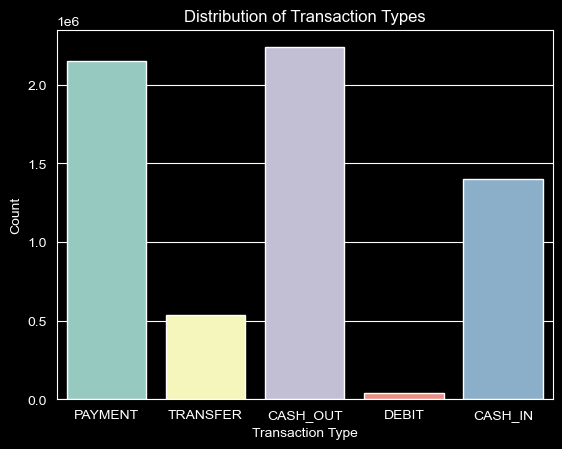

In [44]:
# Distribution of Transaction Types
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')

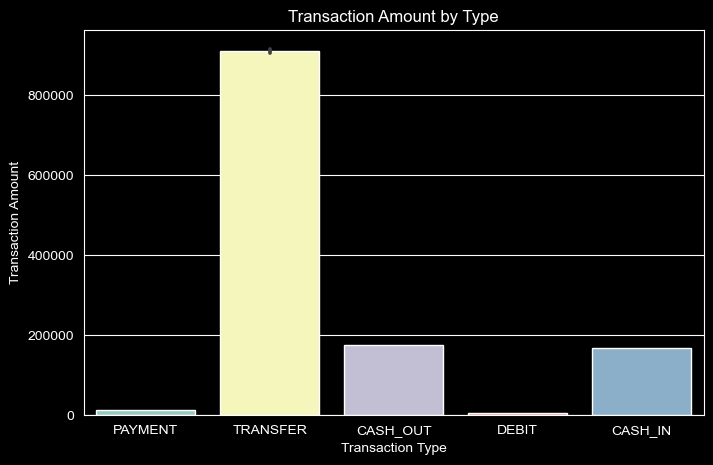

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='type', y='amount')
plt.xticks(rotation=0)  
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

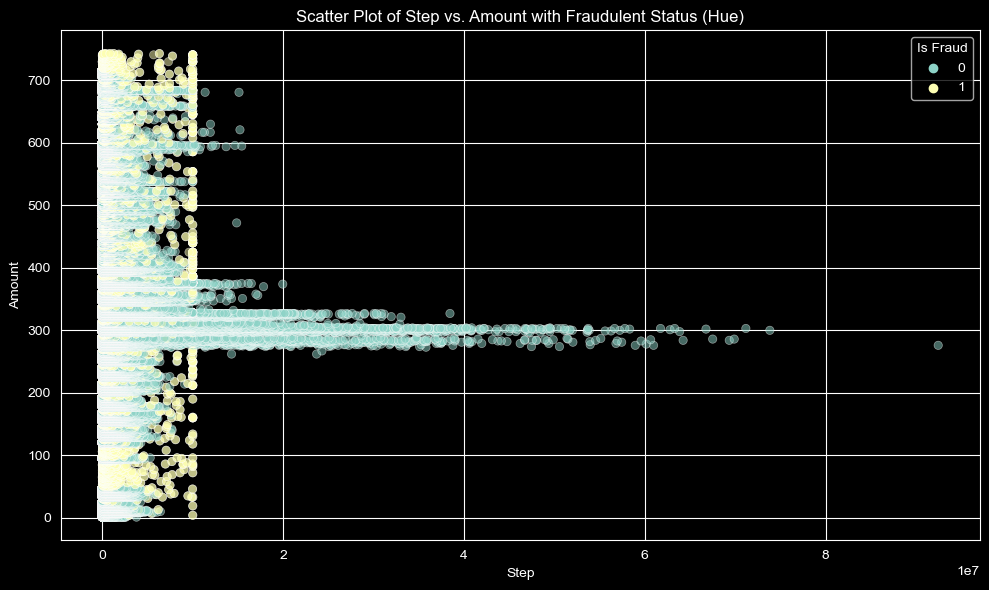

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='step', hue='isFraud', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs. Amount with Fraudulent Status (Hue)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Is Fraud')
plt.show()

### EXPLORATORY DATA ANALYSIS:

In [30]:
# number of fraud and legitimate transactions
fraud = len(df[df['isFraud'] == 1])
legit = len(df[df['isFraud'] == 0])

print("Number of Fraud transactions: ", fraud)
print("Number of Legitimate transactions: ", legit)

Number of Fraud transactions:  8213
Number of Legitimate transactions:  6354407


### 
- From the above results we can see that the dataset is highly imbalanced and hence we will have to train the model using methods which are best suited for handling imbalanced datasets

--------------------

## 2. ML Models for our Fraud Detection Model:
Methods best suited for handling imbalanced datasets and maintaining high accuracy are:
- Decision Tree
- Random Forest Classifer
- XGBoost Classifier

Hence, we will be using these methods for our model training.

---------------------------

In [31]:
# visualzing the merchants data
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [32]:
# checking correlation
corr = df.corr(numeric_only=True)
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

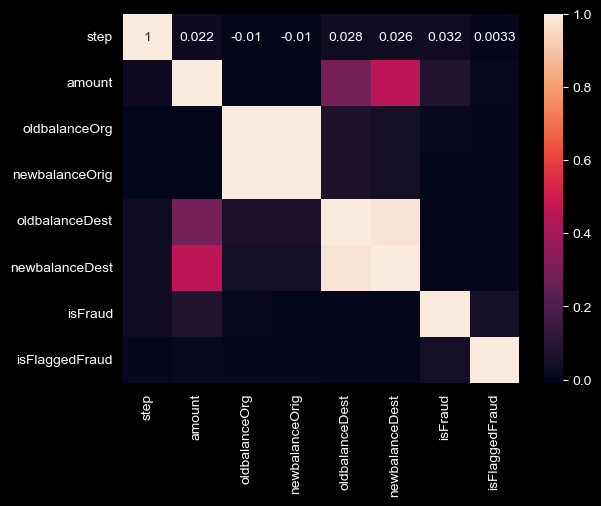

In [33]:
# plotting correlation using heatmap
sns.heatmap(data=corr, annot=True)

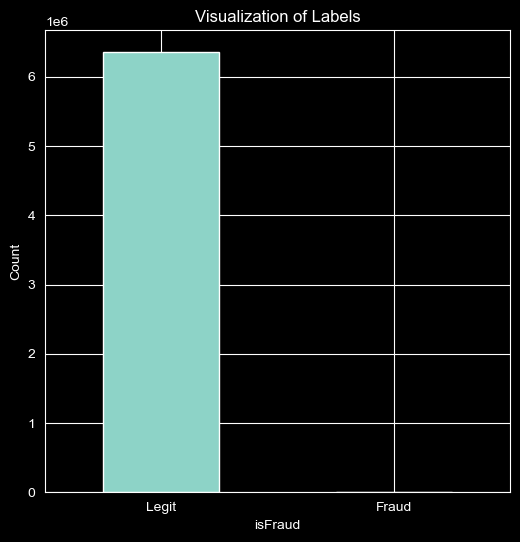

In [34]:
# plotting bar chart for legit & fraud transaction
plt.figure(figsize=(6,6))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

### FEATURE ENGINEERING:

In [35]:
# creating a copy of the original dataframe
df_new = df.copy()
df_new.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


### LABEL ENCODING:

In [37]:
# checking object datatypes
objList = df_new.select_dtypes(include = "object").columns
print(objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


###
- There are 3 attributes with object datatype. We need to label encode these to check multicollinearity.

In [38]:
# encoding the objects
le = LabelEncoder()

for f in objList:
    df_new[f] = le.fit_transform(df_new[f].astype(str))

print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [39]:
df_new.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0
5,1,3,7817.71,6026525,53860.0,46042.29,2247218,0.0,0.0,0,0


## 1.3 Multicolllinearity:

In [40]:
# function to find the variation inflation factor
def cal_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

cal_vif(df_new)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


###
Here we can see some highly correlated attributes with very high variance inflation factor:
- oldbalanceOrg and newbalanceOrig
- oldbalanceDest and newbalanceDest
- nameDest and nameOrig

Therefore we will combine these pairs of collinear attributes and drop the individual ones.

In [41]:
# creating new features to capture the change in balances and transaction paths
df_new['Actual_amount_orig'] = df_new.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df_new['Actual_amount_dest'] = df_new.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df_new['TransactionPath'] = df_new.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df_new = df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

cal_vif(df_new)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

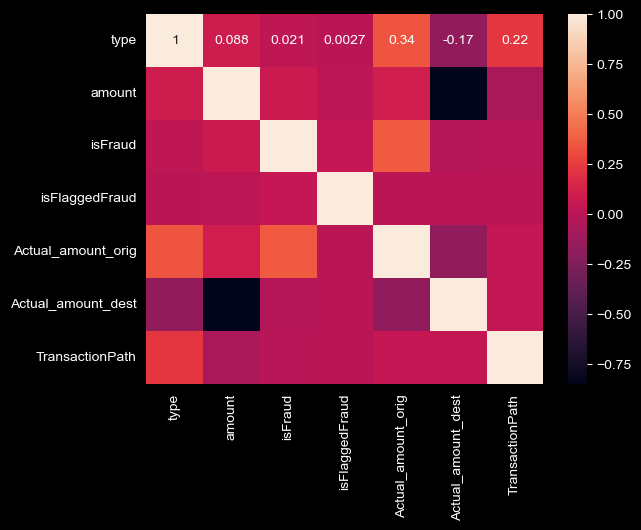

In [42]:
# new correlation heatmap
corr=df_new.corr()

sns.heatmap(corr,annot=True)

-----------------------

## 3. VARIABLE SELECTION: 
- We selected the variables using variance inflation factor and correlation heatmap.
- We only had to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

-------------------

### ML MODEL BUILDING:

### - Scaling the Data:

In [47]:
# scaling the dataset
scaler = StandardScaler()
df_new["NormalizedAmount"] = scaler.fit_transform(df_new["amount"].values.reshape(-1, 1))
df_new.drop(["amount"], inplace= True, axis= 1)

Y = df_new["isFraud"]
X = df_new.drop(["isFraud"], axis= 1)

### - Splitting the Data:

In [48]:
# split the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### - Model Training:

### 1) DECISION TREE:

In [49]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dt = dtc.predict(X_test)
dtc_score = dtc.score(X_test, Y_test) * 100

### 2) RANDOM FOREST ALGORITHM:

In [50]:
# Random Forest
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, Y_train)

Y_pred_rf = rfc.predict(X_test)
rfc_score = rfc.score(X_test, Y_test) * 100

### 3) XGBOOST:

In [51]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)
xgb_score = xgb.score(X_test, Y_test) * 100

In [52]:
print("Decision Tree Score: ", dtc_score)
print("Random Forest Score: ", rfc_score)
print("XGBoost Score      : ", xgb_score)

Decision Tree Score:  99.92319725731433
Random Forest Score:  99.95892677335227
XGBoost Score      :  99.95766942967938


###
- Here we can see that Random Forest Classifier is better than Decision Tree and Random Forest Classifier.

### CREATING CONFUSION MATRIX:

In [53]:
# Confusion Matrix - Decision Tree
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("__________________________________________________________________________________________")

# Confusion Matrix - Random Forest
print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("__________________________________________________________________________________________")

# Confusion Matrix - XGBoost
print("TP,FP,TN,FN - XGBoost")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_xgb).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1714
False Positives: 745
True Negatives: 1905606
False Negatives: 721
__________________________________________________________________________________________
TP,FP,TN,FN - Random Forest
True Positives: 1712
False Positives: 61
True Negatives: 1906290
False Negatives: 723
__________________________________________________________________________________________
TP,FP,TN,FN - XGBoost
True Positives: 1670
False Positives: 43
True Negatives: 1906308
False Negatives: 765


###
- TP(Decision Tree) ~ TP(Random Forest) ~ TP(XGBoost) so no competetion here.
- FP(Decision Tree) >> FP(Random Forest) >> FP(XGBoost) - XGBoost has an edge here.
- TN(Decision Tree) < TN(Random Forest) < TN(XGBoost) - Random Forest is better here too
- FN(Decision Tree) ~ FN(Random Forest) ~ FN(XGBoost)

In [54]:
# confusion matrix - decision tree
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("__________________________________________________________________________________________")

# confusion matrix - random forest
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("__________________________________________________________________________________________")

# confusion matrix - XGBoost
confusion_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb.round())
print('Confusion Matrix - XGBoost')
print(confusion_matrix_xgb)

Confusion Matrix - Decision Tree
[[1905606     745]
 [    721    1714]]
__________________________________________________________________________________________
Confusion Matrix - Random Forest
[[1906290      61]
 [    723    1712]]
__________________________________________________________________________________________
Confusion Matrix - XGBoost
[[1906308      43]
 [    765    1670]]


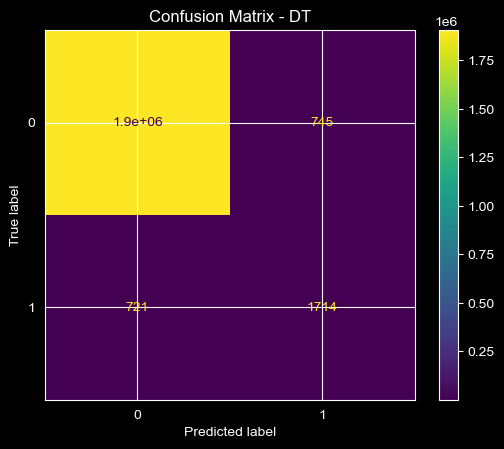

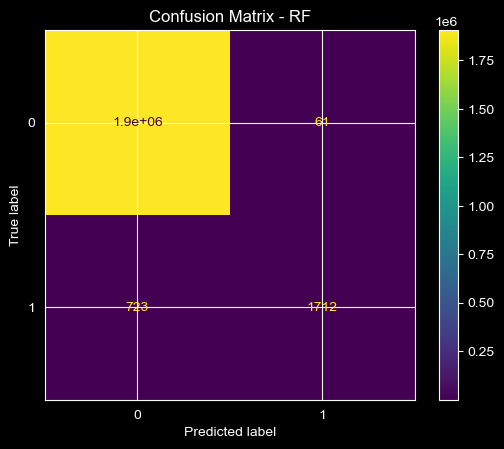

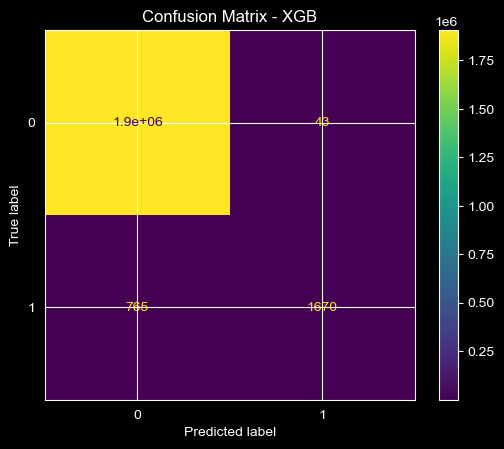

In [64]:
# visualising confusion matrix - decision tree
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - random forest
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

# visualising confusion matrix - XGBoost
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb)
disp.plot()
plt.title('Confusion Matrix - XGB')
plt.show()

----------------------------

### 4. MODEL EVALUATION/ MODEL PERFORMANCE DEMONSTRATION:

- We use metrics like accuracy, precision, recall, F1-score and AUC-ROC due to imbalanced datset
- We create classification report, confusion matrices and ROC curves for visualization

-----------------------

In [55]:
# classification report - decision tree
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("__________________________________________________________________________________________")

# classification report - random forest
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("__________________________________________________________________________________________")

# classification report - XGBoost
classification_report_xgb = classification_report(Y_test, Y_pred_xgb)
print("Classification Report - XGBoost")
print(classification_report_xgb)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

__________________________________________________________________________________________
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

__________________________________________________________________________________________
Classification Report - XGBoost
              precision    recall  f1-score   support

 

###
- Here we can see XGBoost has a higher precision but Random Forest Classifer has a higher F1 score.

### AUC ROC CURVE for calculating False Positve Rate and True Positive Rate:

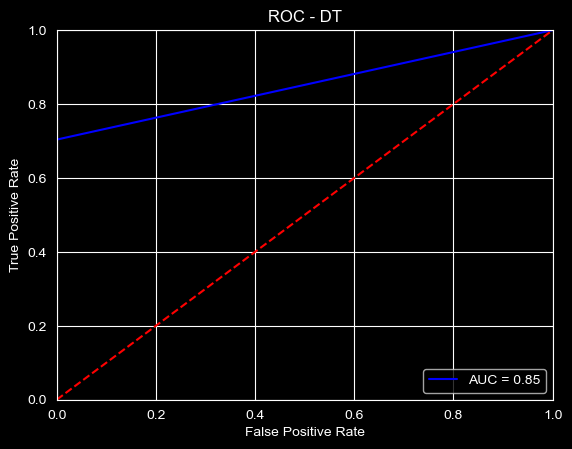

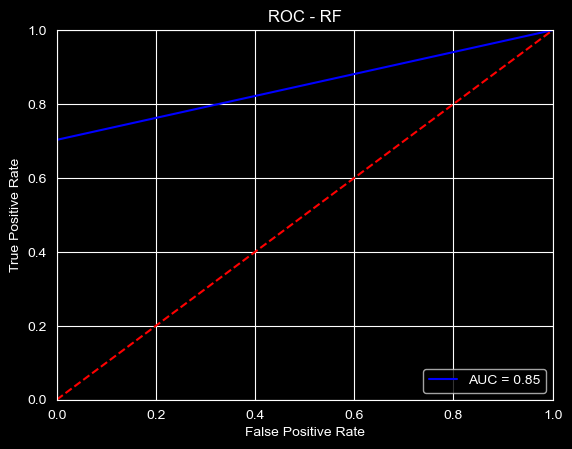

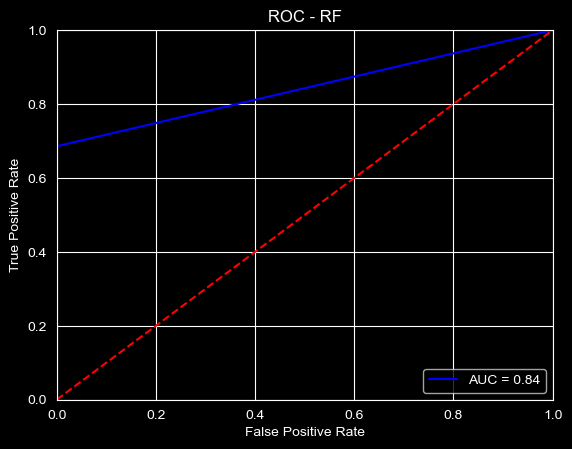

In [72]:
# AUC ROC - decision tree
# calculating the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = roc_curve(Y_test, Y_pred_dt)
roc_auc = auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - random forest
# calculating the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = roc_curve(Y_test, Y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - XGBoost
# calculating the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = roc_curve(Y_test, Y_pred_xgb)
roc_auc = auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


###
- The AUC ROC for Decision Tree, Random Forest and XGBoost is almost equal, so all the three models are pretty good.

-----------------------------------

### ADDITIONAL: Saving the model for deployment

In [73]:
import pickle

In [85]:
pickle.dump(xgb,open('model.sav','wb'))

In [76]:
pickle.dump(scaler,open('scaler.sav','wb'))

In [86]:
xgb_model=pickle.load(open('model.sav','rb'))

In [78]:
new_scaler=pickle.load(open('scaler.sav','rb'))

In [83]:
df_new.head(6)

,type,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,NormalizedAmount
0,3,0,0,9839.64,0.0,2419963.0,-0.281560
1,3,0,0,1864.28,0.0,3922922.0,-0.294767
2,4,1,0,181.00,0.0,1441841.0,-0.297555
3,1,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,0,0,11668.14,0.0,4274900.0,-0.278532
5,3,0,0,7817.71,0.0,8273743.0,-0.284908


-------------------

## CONCLUSION:

- We saw that the Accuracy of Random Forest, Decision Tree and XGBoost is equal, although the precision of XGBoost is higher.
- In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want to know about the Fraud transactions to be predicted correctly.
- This is also one of the reason why Ensemble techniques are used instead of other algorithms.
- Another reason for why I have chosen XGBoost is because of the highly unbalanced dataset. XGBoost builds a predictive model by combining the predictions of multiple individual models, often decision trees, in an iterative manner.ner.

--------------------

## 5. Key Factors Predicting Fraudulent Customers:
- Location mismatch: When transaction location is significantly different from the usual location.
- Unusual time: When transactions are made at an unusual time of day or night.
- Large transaction amount: When the transaction amount exceeds a user's typical spending patterns.
- New device: When transaction is made from a new device not previously used by the user.
- Multiple failed login attempts: When there is recent history of failed login attempts from unknown locations.

------------------------

## 6. Do These Factors Make Sense?

Yes, these factors can be indicative of fraud:
- Location mismatch: Suggests someone else might be using the account.
- Unusual time: Fraudsters might exploit times when users are less likely to be active.
- Large transaction amount: A significant change from normal spending patterns could be a red flag.
- New device: Using a new device increases the risk of unauthorized access.
- Multiple failed login attempts: Suggests someone might be trying to gain unauthorized access.

-----------------

## 7. Infrastructure Prevention Strategies:

- Multi-factor Authentication: Requires a second factor (e.g., password) for login, making it harder for unauthorized users.
- Device Fingerprinting: Track user devices and flag transactions from unrecognized devices.
- Transaction Monitoring: Flag transactions that deviate from user's typical spending patterns.
- Geolocation Verification: Verify that the transaction location aligns with user's expected location.

----------------------------------

## 8. Determining Effectiveness of Implemented Actions:

- Monitor Fraud Rates: Track the number of fraudulent transactions after implementing the new measures.
- False Positives: Measure the rate of legitimate transactions flagged as fraudulent (reduce if too high).
- False Negatives: Monitor the rate of fraudulent transactions missed by the system (reduce if possible).
- Alert Tuning: Adjust alert thresholds based on changes in fraud patterns.

--------------------------------